In [1]:
import os
import sys
from glob import glob
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from collections import defaultdict
from utils import label_map_util
from utils import visualization_utils as vis_util
import random

%matplotlib inline

ImportError: No module named utils

In [2]:
def load_graph(graph_file):
    """Loads a frozen inference graph"""
    graph = tf.Graph()
    with graph.as_default():
        od_graph_def = tf.GraphDef()
        with tf.gfile.GFile(graph_file, 'rb') as fid:
            serialized_graph = fid.read()
            od_graph_def.ParseFromString(serialized_graph)
            tf.import_graph_def(od_graph_def, name='')
    return graph


def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

In [3]:
## Test model
# PATH_TO_GRAPH = r'models/rcnn_resnet101/frozen_inference_graph.pb'
# PATH_TO_GRAPH = r'models/rcnn/frozen_inference_graph.pb'
PATH_TO_GRAPH = r'models/ssd_udacity/frozen_inference_graph.pb' ## load SSD trained on udacity's parking lot images
PATH_TO_LABELS = r'data/udacity_label_map.pbtxt'
NUM_CLASSES = 13

In [4]:
detection_graph = load_graph(PATH_TO_GRAPH)

In [5]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
print(category_index)

{1: {'id': 1, 'name': 'Green'}, 2: {'id': 2, 'name': 'Red'}, 3: {'id': 3, 'name': 'Yellow'}, 4: {'id': 4, 'name': 'off'}}


In [6]:
IMAGE_SIZE = (12, 8)

SCORES
[0.9973469  0.00587089 0.00471904 0.00408486 0.00406556 0.00362622
 0.0036046  0.00349569 0.00340854 0.00338682]
CLASSES
[2. 4. 4. 1. 1. 4. 1. 4. 1. 4.]


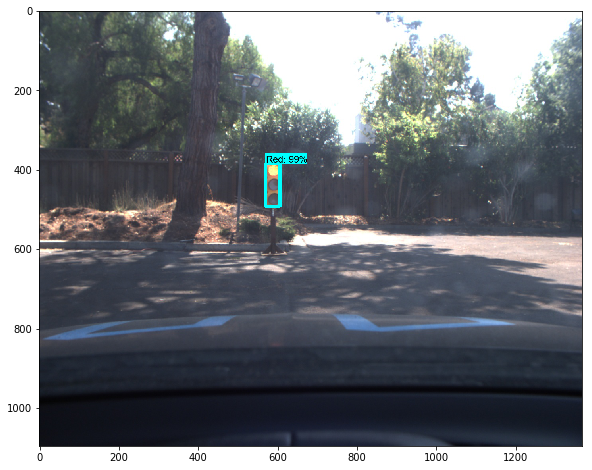

SCORES
[0.9970202  0.00464791 0.00439182 0.00434729 0.00432909 0.00428176
 0.0042758  0.00418569 0.00414809 0.00413019]
CLASSES
[1. 4. 3. 4. 1. 4. 3. 4. 1. 4.]


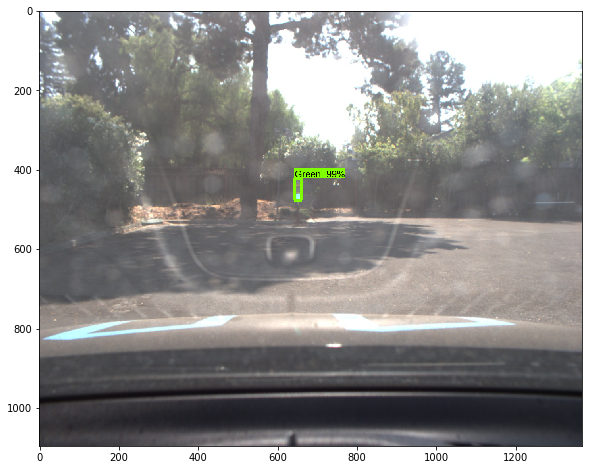

SCORES
[0.00548884 0.005482   0.00522701 0.00498571 0.00497997 0.00486398
 0.0045078  0.0044698  0.00436185 0.00432592]
CLASSES
[2. 3. 4. 4. 2. 3. 4. 4. 2. 4.]


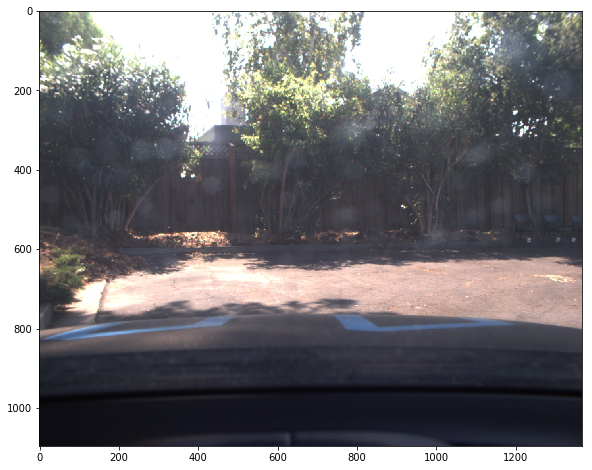

SCORES
[0.99708694 0.00512568 0.00499636 0.00417775 0.00388629 0.00387063
 0.00383914 0.00375592 0.00362313 0.00361626]
CLASSES
[2. 4. 4. 4. 3. 4. 4. 3. 4. 3.]


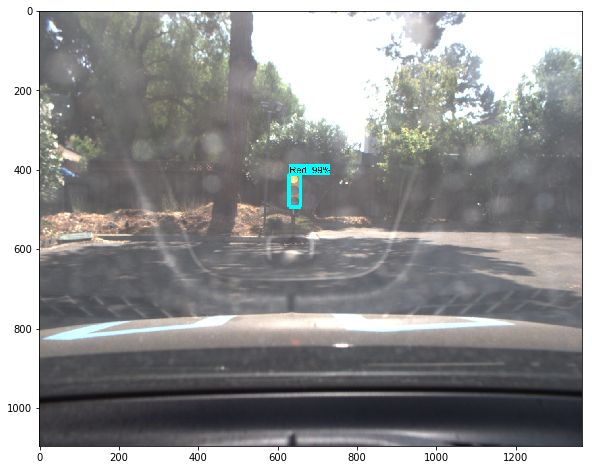

SCORES
[0.983787   0.00542767 0.00531024 0.00492869 0.00488737 0.00468351
 0.00411131 0.00399278 0.00388165 0.00382658]
CLASSES
[2. 4. 2. 4. 1. 4. 1. 4. 1. 3.]


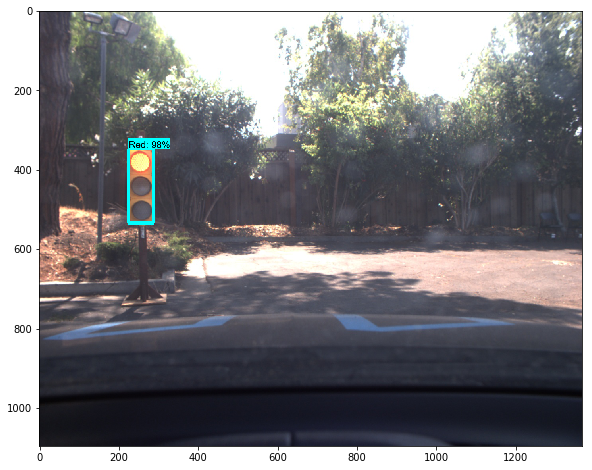

SCORES
[0.81349576 0.00503271 0.00501178 0.00445517 0.0044176  0.00411259
 0.00408658 0.00399353 0.00381617 0.00379662]
CLASSES
[2. 2. 1. 1. 4. 3. 3. 1. 3. 4.]


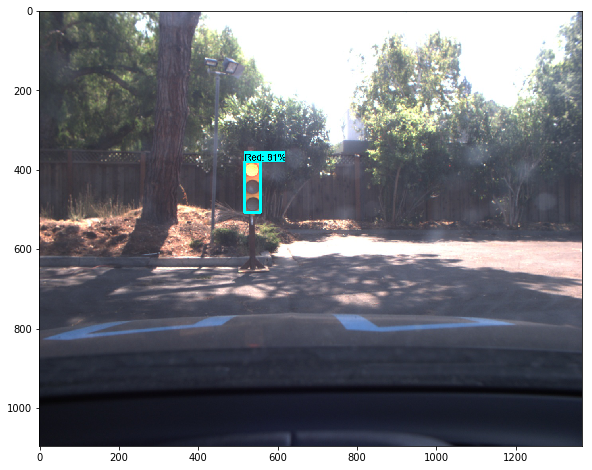

SCORES
[0.9976494  0.00418537 0.00384451 0.00378562 0.00365739 0.00364167
 0.00359445 0.00352193 0.0034896  0.00343957]
CLASSES
[2. 3. 2. 4. 3. 2. 4. 2. 3. 4.]


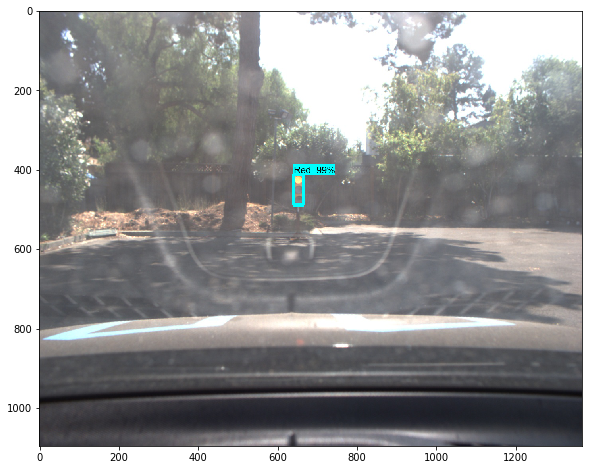

SCORES
[0.99606425 0.00487463 0.00401015 0.00389816 0.00371532 0.00368282
 0.00367022 0.00364872 0.00359932 0.00359778]
CLASSES
[1. 4. 2. 3. 4. 4. 3. 2. 1. 1.]


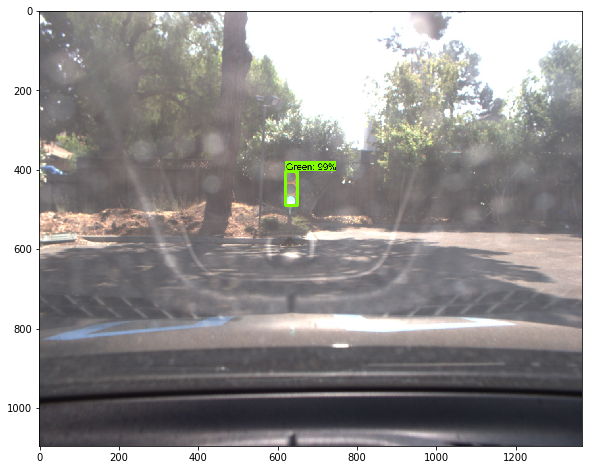

SCORES
[0.99848723 0.00444512 0.00430833 0.00384245 0.00378628 0.00366364
 0.00366069 0.00349039 0.00339245 0.00336028]
CLASSES
[2. 2. 2. 1. 2. 3. 4. 1. 4. 4.]


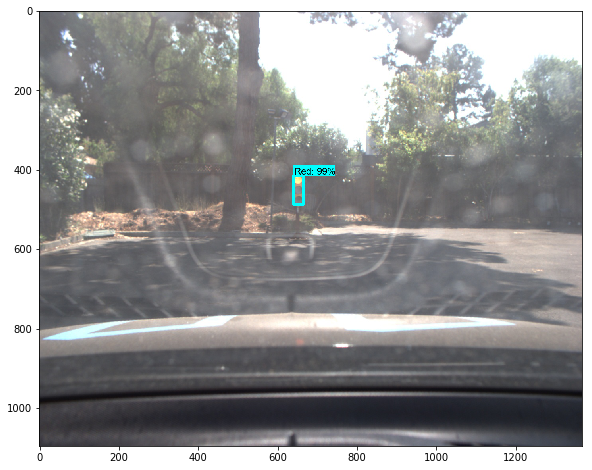

SCORES
[0.9950094  0.00565451 0.00428184 0.00412135 0.00410477 0.00398098
 0.00386467 0.00385777 0.0037934  0.00369351]
CLASSES
[1. 4. 4. 3. 1. 4. 4. 4. 4. 4.]


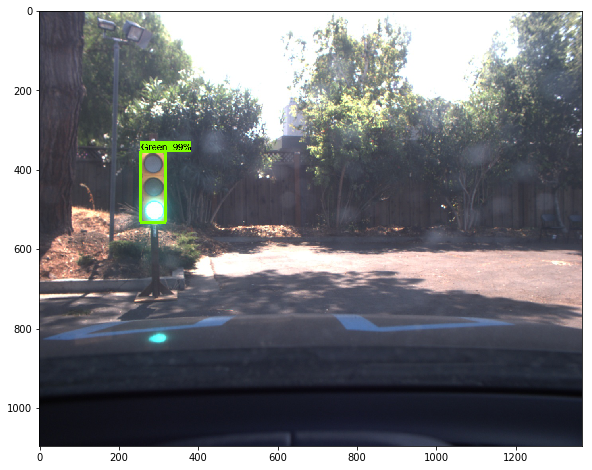

SCORES
[0.9903944  0.00595201 0.00460658 0.00393852 0.0038032  0.00364845
 0.00359313 0.00356889 0.00344854 0.00344392]
CLASSES
[3. 4. 4. 4. 3. 4. 3. 4. 3. 4.]


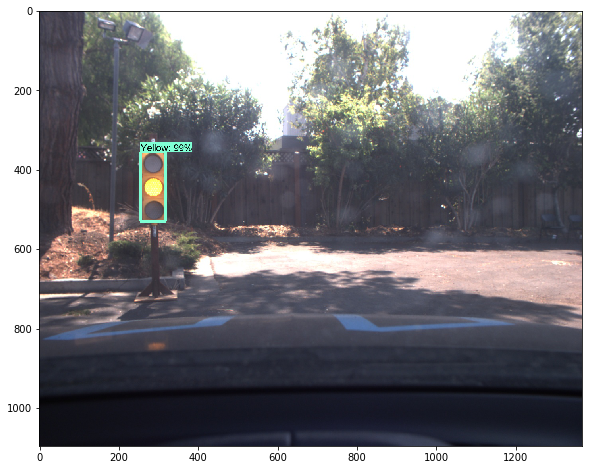

In [7]:
PATH_TO_IMGS = r'data/udacity_testarea_rgb'
TEST_IMGS = glob(os.path.join(PATH_TO_IMGS, r'*.jpg'))
random.shuffle(TEST_IMGS)

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        detect_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        detect_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detect_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        
        for idx, img_path in enumerate(TEST_IMGS):
            random.shuffle(TEST_IMGS)
            image = Image.open(img_path)
            image_np = load_image_into_numpy_array(image)
            image_expanded = np.expand_dims(image_np, axis=0)
            
            (boxes, scores, classes, num) = sess.run(
                [detect_boxes, detect_scores, detect_classes, num_detections],
                feed_dict={image_tensor: image_expanded})
            
            print('SCORES')
            print(scores[0])
            print('CLASSES')
            print(classes[0])
            
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np, 
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                line_thickness=8)
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_np)
            plt.show()
            
            if idx == 10:
                break

In [8]:
PATH_TO_GRAPH = r'models/ssd_sim/frozen_inference_graph.pb' ## load SSD trained on udacity's simulator images
detection_graph = load_graph(PATH_TO_GRAPH)

SCORES
[0.99456304 0.98578346 0.01670949 0.00825321 0.0079201  0.00746307
 0.00575944 0.00568984 0.00562876 0.00540954]
CLASSES
[2. 2. 2. 2. 2. 3. 4. 2. 4. 4.]


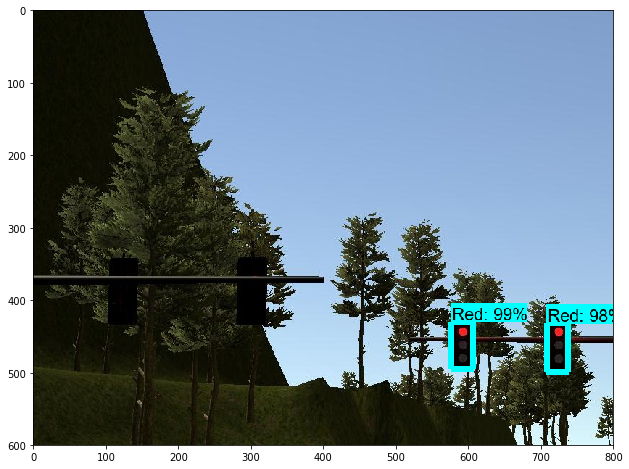

SCORES
[0.99948907 0.9987078  0.97994334 0.00502719 0.00485199 0.00483135
 0.00481754 0.00444233 0.00434587 0.00424747]
CLASSES
[2. 2. 2. 2. 4. 1. 2. 4. 3. 2.]


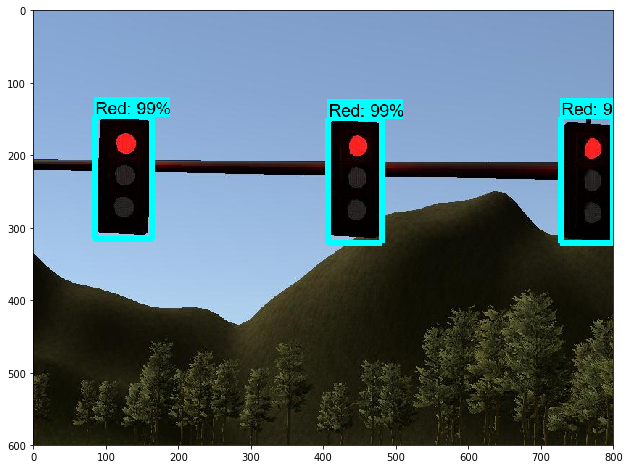

SCORES
[0.88549787 0.7229444  0.5377118  0.00666254 0.00599447 0.00548193
 0.00531469 0.00510492 0.00508822 0.00495981]
CLASSES
[2. 2. 2. 2. 2. 2. 2. 3. 4. 3.]


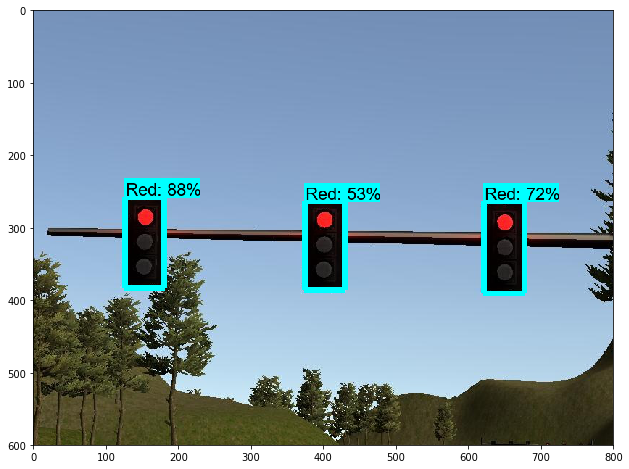

SCORES
[0.00457505 0.0044674  0.00446403 0.00439052 0.00428835 0.00423297
 0.00420832 0.00411604 0.00408237 0.00406824]
CLASSES
[4. 2. 4. 1. 4. 2. 4. 1. 1. 4.]


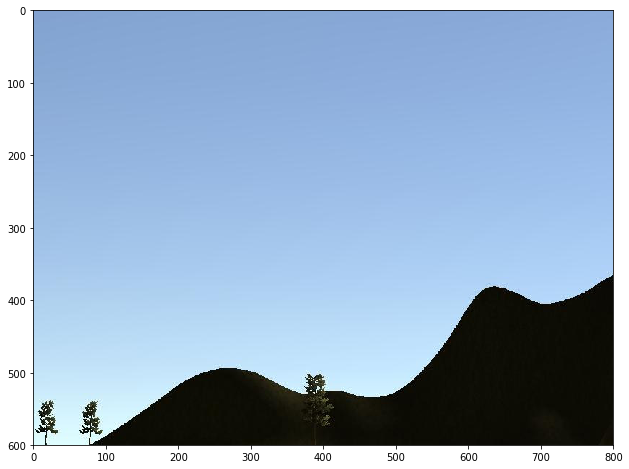

SCORES
[0.00846644 0.00803026 0.00684512 0.00668108 0.00656448 0.00644651
 0.0063139  0.00596688 0.00592175 0.0057979 ]
CLASSES
[1. 2. 2. 2. 3. 3. 3. 1. 2. 1.]


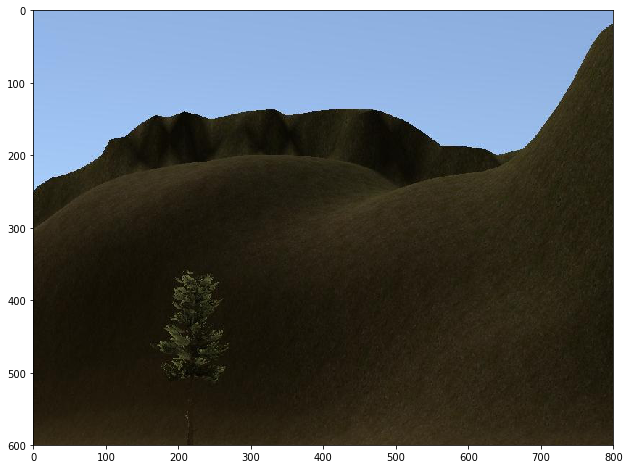

SCORES
[0.99936897 0.99788874 0.96993476 0.00483109 0.0047877  0.0044478
 0.00418599 0.00415625 0.0040999  0.00407193]
CLASSES
[2. 2. 2. 2. 4. 4. 2. 4. 1. 2.]


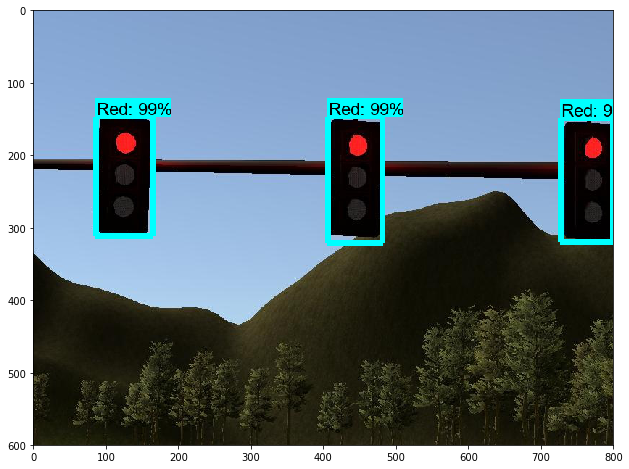

SCORES
[0.9935534  0.78023046 0.73579407 0.01311983 0.00727968 0.00704404
 0.00655296 0.00645179 0.00607176 0.0056883 ]
CLASSES
[1. 1. 1. 1. 2. 1. 2. 1. 1. 3.]


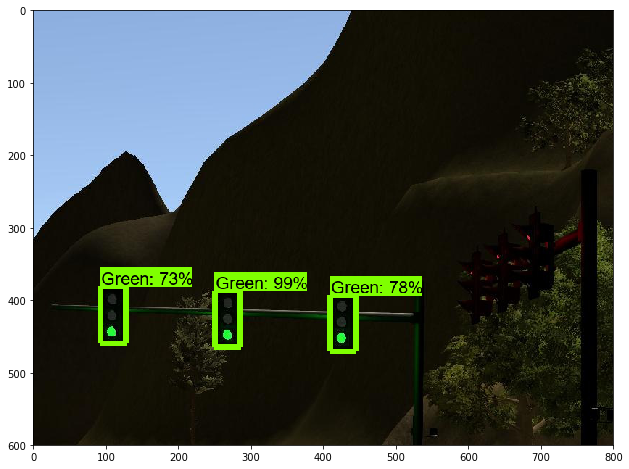

SCORES
[0.99281764 0.9428749  0.9094864  0.02578995 0.01500733 0.00614413
 0.00597352 0.00537702 0.00531348 0.00518326]
CLASSES
[1. 1. 1. 1. 1. 1. 1. 4. 2. 1.]


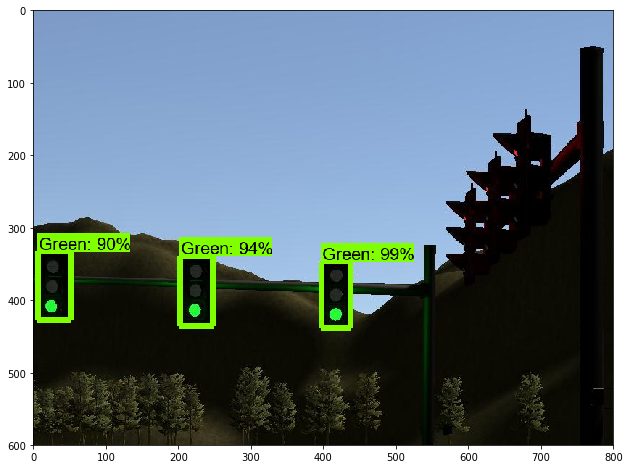

SCORES
[0.8814997  0.8138649  0.38313314 0.00507292 0.00453252 0.00417033
 0.00416637 0.0041059  0.00407147 0.00398269]
CLASSES
[1. 1. 1. 1. 4. 4. 4. 3. 4. 1.]


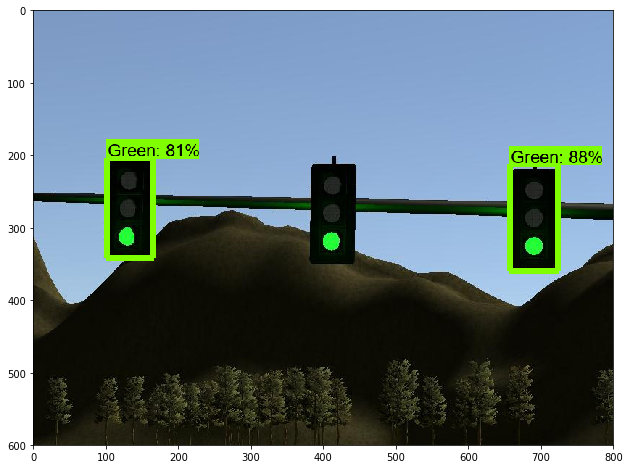

SCORES
[0.00886897 0.00864935 0.00573267 0.0056512  0.00563185 0.00549438
 0.00520855 0.00500943 0.00447869 0.00447713]
CLASSES
[3. 2. 1. 2. 3. 4. 4. 4. 1. 4.]


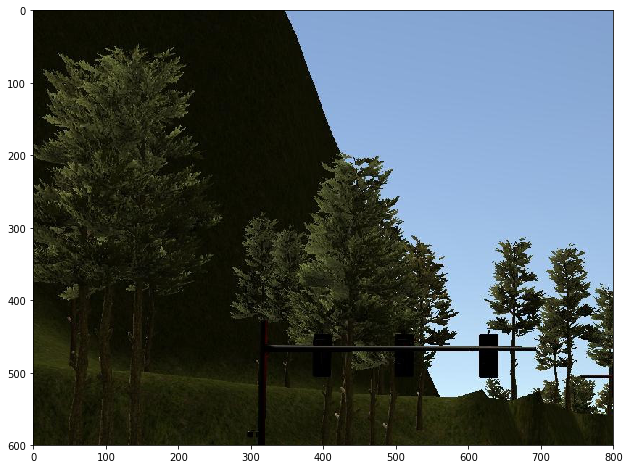

SCORES
[0.9872213  0.97634363 0.5242206  0.01246992 0.0062374  0.00596491
 0.00585272 0.00578688 0.00550447 0.00547401]
CLASSES
[1. 1. 1. 1. 1. 1. 4. 1. 1. 1.]


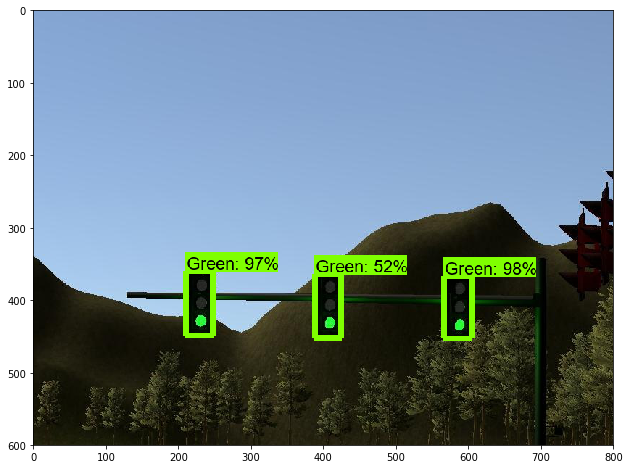

In [9]:
PATH_TO_IMGS = r'data/simulator_dataset_rgb'
subfolder = ['Green', 'Red', 'Yellow', 'Unknown']
TEST_IMGS = []
for i in subfolder:
    TEST_IMGS += glob(os.path.join(os.path.join(PATH_TO_IMGS, i), r'*.jpg'))
random.shuffle(TEST_IMGS)

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        detect_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        detect_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detect_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        
        for idx, img_path in enumerate(TEST_IMGS):
            image = Image.open(img_path)
            image_np = load_image_into_numpy_array(image)
            image_expanded = np.expand_dims(image_np, axis=0)
            
            (boxes, scores, classes, num) = sess.run(
                [detect_boxes, detect_scores, detect_classes, num_detections],
                feed_dict={image_tensor: image_expanded})
            
            print('SCORES')
            print(scores[0])
            print('CLASSES')
            print(classes[0])
            
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np, 
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                line_thickness=8)
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_np)
            plt.show()
            
            if idx == 10:
                break